# Beyond Hello World, A Computer Vision Example
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=2x-1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

In [1]:
import tensorflow as tf
print (tf.__version__)

2.5.0


# Callback to stop training after reaching a certain threshold

To stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [2]:
#Stopping once 80% accuracy is reached

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.2):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True
        
# We instantiate the class that we just created, we do that with this code. 
callbacks = myCallback()

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [3]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)


Lets look on how the above values look like. Lets print a training image and training label. 

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 33]
  [ 96]
  [175]
  [156]
  [ 64]
  [ 14]
  [ 54]
  [137]
  [204]
  [194]
  [102]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 73]
  [186]
  [177]
  [183]
  [175]
  [188]
  [232]
  [255]
  [223]
  [219]
  [194]
  [179]
  [186]
  [213]
  [146]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 35]
  [163]
  [140]
  [150]
  [152]
  [150]
  [146]
  [175]
  [175]
  [173]
  [171]
  [156]
  [152]
  [148]
  [129]
  [156]
  [140]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [150]
  [142]
  [140]
  [152]
  [160]
  [156]
  [146]
  [142]
  [127]
  [135]
  [133]
  [140]
  [140]
  [137]
  [133]
  [125]
  [169]
  [ 75]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 54]
  [167]
  [146]
  [129]
  [142]
  [137]
  [137]


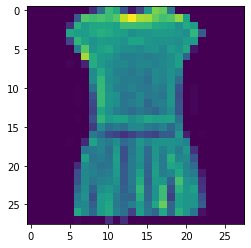

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[3])
print (training_images[3])
print (training_labels[3])

# Normalize the data
All values in the above image array is in 0 to 255 range. Normalize them by bringing them in the range of 0 to 1.
fortunately in Python it's easy to normalize a list like this without looping.

In [7]:
training_images = training_images/255.0
test_images = test_images/255.0

# Design the model

In [8]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

**Sequential** : This defines the sequence of layers in the nueral network. 

**Flatten** : This converts the input shape into linear. Converts our square image into 1 dimension set.

**Dense** : Adds layers of nuerons

Each layer needs activation function to tell them what to do.  Examples are:

**Relu** : means if X>0, return X, else return 0, --> so what it does is it passes values 0 or greater to the next layer in the network.

**Softmax** : Takes a set of values and effective picks the bigger one.Eg: if output of last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

# Compile the model
Now to build the model once you defined the model. This is done by compiling it with an optimizer and a loss function. 

In [9]:
model.compile(optimizer=tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train the model
Training is done by model.fit (x,y,epochs = 10)  OR
model.fit (training_images,training_labels, epochs = 10)

Asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.


In [10]:
# In model.fit, I used the callbacks parameter and pass it this instance of the class.
model.fit(training_images, training_labels, epochs=10,  callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.9110 - accuracy: 0.6683
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.5742 - accuracy: 0.7876
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5168 - accuracy: 0.8118
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4803 - accuracy: 0.8279
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4558 - accuracy: 0.8380
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4367 - accuracy: 0.8447
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4235 - accuracy: 0.8497
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4126 - accuracy: 0.8529
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4007 - accuracy: 0.8578
Epoch 10/10
1875/1875 [==============================] - 34s 18m

# Evaluate the model
Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [10]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 821us/step - loss: 0.3219 - accuracy: 0.8848


[0.32189545035362244, 0.8848000168800354]